# importing dependecies


In [24]:
## Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from datetime import datetime, timezone
import seaborn as sns
import datetime as dt
import gc
import pickle
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from matplotlib.pylab import rcParams

# import math
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM

# Loading the Dataset and Data preprocessing


In [25]:
import pandas as pd
# Load the dataset
df = pd.read_csv('GDM_Prediction_Dataset.csv')

# Data preprocessing
# Define numerical and categorical columns
numerical_columns = ['Age', 'Pre-pregnancy BMI', 'Fasting Plasma Glucose']
categorical_columns = ['Previous GDM', 'Family History of Diabetes', 'PCOS', 'Hypertension', 'Physical Activity']

# Check for missing values in numerical and categorical columns
print("\nMissing Values:")
print(df[numerical_columns].isnull().sum())
print(df[categorical_columns].isnull().sum())

# Display the first few rows and column data types
print(df.head())
print(df.info())

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
print(df[numerical_columns].describe())

# Summary of categorical data
print("\nCategorical Data Summary:")
for col in categorical_columns:
    print(f"\n{col} Value Counts:")
    print(df[col].value_counts())



Missing Values:
Age                       0
Pre-pregnancy BMI         0
Fasting Plasma Glucose    0
dtype: int64
Previous GDM                  0
Family History of Diabetes    0
PCOS                          0
Hypertension                  0
Physical Activity             0
dtype: int64
   Age  Pre-pregnancy BMI  Previous GDM  Family History of Diabetes  PCOS  \
0   32          36.636151             0                           0     0   
1   35          26.251498             0                           0     0   
2   41          30.634671             0                           0     0   
3   20          32.763337             0                           0     0   
4   23          29.614261             0                           0     0   

   Hypertension Physical Activity  Fasting Plasma Glucose  GDM Risk  
0             0              High              119.854732     False  
1             1              High               72.038015     False  
2             0          Moderate       

# Visualizations for distribution of numerical data


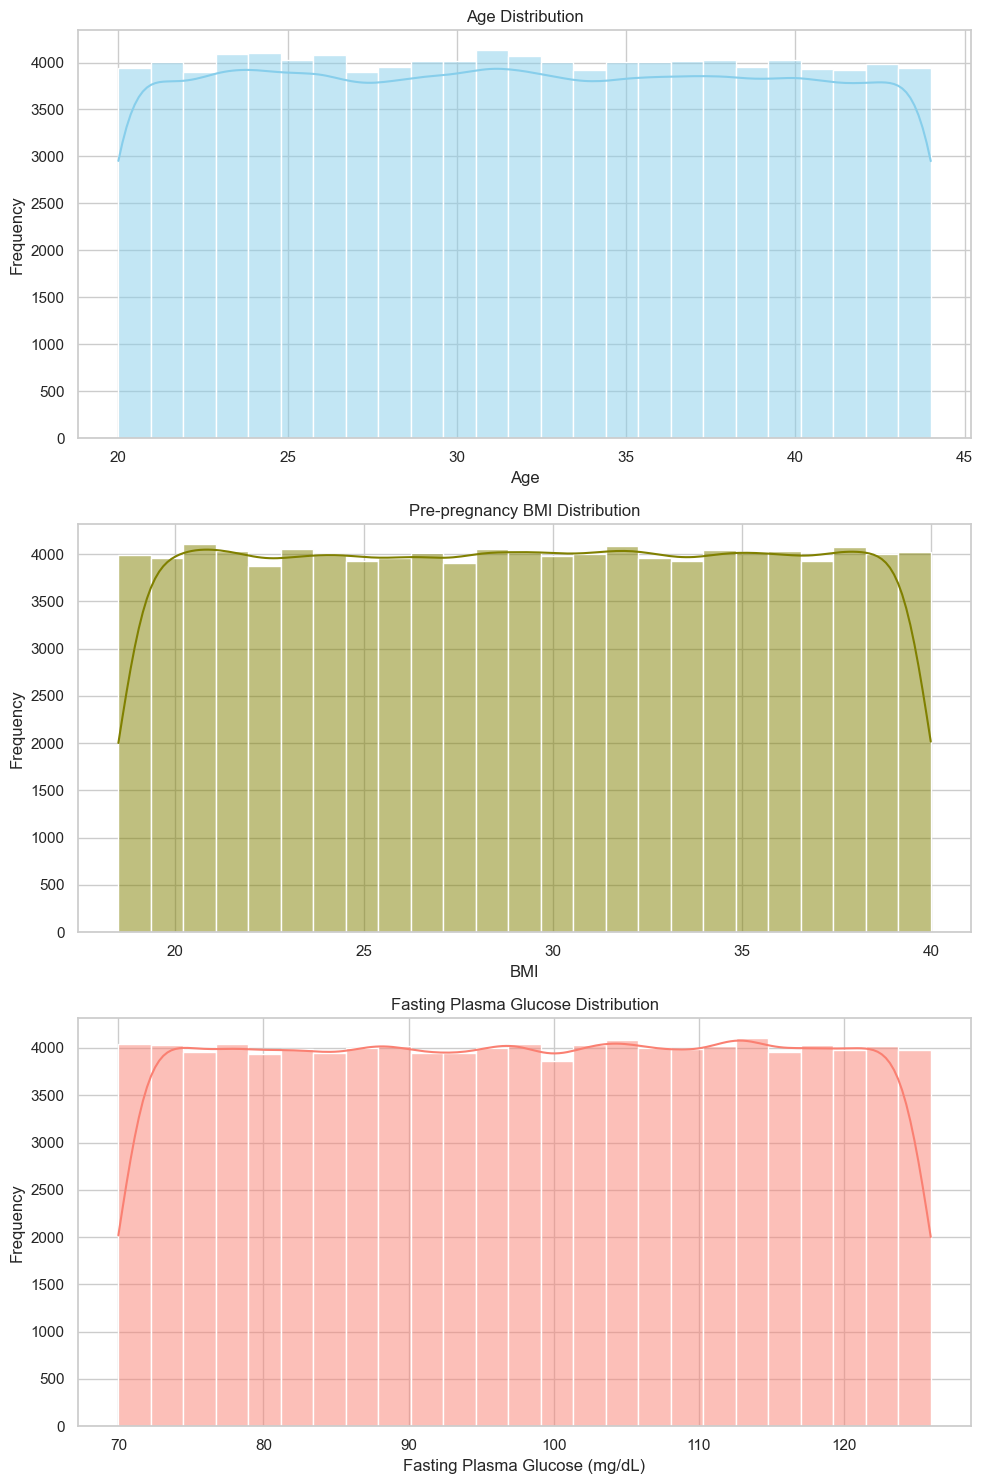

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of numerical data
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Age distribution
sns.histplot(df['Age'], bins=25, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Pre-pregnancy BMI distribution
sns.histplot(df['Pre-pregnancy BMI'], bins=25, kde=True, ax=axes[1], color='olive')
axes[1].set_title('Pre-pregnancy BMI Distribution')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Fasting Plasma Glucose distribution
sns.histplot(df['Fasting Plasma Glucose'], bins=25, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Fasting Plasma Glucose Distribution')
axes[2].set_xlabel('Fasting Plasma Glucose (mg/dL)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Data Cleaning


In [27]:
import pandas as pd

# Drop any empty line in the file
df.dropna(how='all', inplace=True)

# Handling rows with too many missing values
# Assuming "too many" is defined as more than half of the columns are missing
threshold = len(df.columns) // 2
df.dropna(thresh=threshold, inplace=True)

# Update the column names based on your dataset
df.rename(columns={
    'Pre-pregnancy BMI': 'Pre_Pregnancy_BMI',
    'Family History of Diabetes': 'Family_History_Diabetes',
    'Physical Activity': 'Physical_Activity',
    'Fasting Plasma Glucose': 'Fasting_Plasma_Glucose'
}, inplace=True)

# Drop rows where specific columns are NA
# For instance, 'Fasting_Plasma_Glucose' is crucial for your analysis
df.dropna(subset=['Fasting_Plasma_Glucose'], inplace=True)

# Convert 'Pre_Pregnancy_BMI' to numeric and handle missing or unreasonable values
df['Pre_Pregnancy_BMI'] = pd.to_numeric(df['Pre_Pregnancy_BMI'], errors='coerce')  # Convert and handle non-numeric entries
df.dropna(subset=['Pre_Pregnancy_BMI'], inplace=True)  # Drop rows where BMI conversion to numeric failed
df = df[df['Pre_Pregnancy_BMI'] > 10]  # Filter out unreasonable BMI values (e.g., BMI less than 10)

# Show the cleaned data
print(df.head(10))


   Age  Pre_Pregnancy_BMI  Previous GDM  Family_History_Diabetes  PCOS  \
0   32          36.636151             0                        0     0   
1   35          26.251498             0                        0     0   
2   41          30.634671             0                        0     0   
3   20          32.763337             0                        0     0   
4   23          29.614261             0                        0     0   
5   23          23.091045             0                        0     0   
6   27          29.386805             1                        1     0   
7   29          27.277016             0                        0     0   
8   39          32.360404             0                        1     0   
9   41          26.291860             0                        0     0   

   Hypertension Physical_Activity  Fasting_Plasma_Glucose  GDM Risk  
0             0              High              119.854732     False  
1             1              High            

# Data processing


In [28]:
# Print the list of all column names to check their exact spelling
print(df.columns)

Index(['Age', 'Pre_Pregnancy_BMI', 'Previous GDM', 'Family_History_Diabetes',
       'PCOS', 'Hypertension', 'Physical_Activity', 'Fasting_Plasma_Glucose',
       'GDM Risk'],
      dtype='object')


In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('GDM_Prediction_Dataset.csv')

df['GDM Risk'] = df['GDM Risk'].astype(int)

# clean or handle outliers or errors:
df['GDM Risk'] = pd.to_numeric(df['GDM Risk'], errors='coerce').fillna(-1).astype(int)

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

# 1. Encoding categorical data
# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Physical Activity'])

# 2. Scaling numerical features
# Normalize numerical features to ensure they're on the same scale
scaler = StandardScaler()
df_encoded[['Age', 'Pre-pregnancy BMI', 'Fasting Plasma Glucose']] = scaler.fit_transform(df_encoded[['Age', 'Pre-pregnancy BMI', 'Fasting Plasma Glucose']])

# 3. Splitting the dataset into training and testing sets
X = df_encoded.drop('GDM Risk', axis=1)
y = df_encoded['GDM Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Now your data is preprocessed and ready for modeling
print("Preprocessed Data Info:")
print(X_train.head())
print(X_test.head())

Preprocessed Data Info:
            Age  Pre-pregnancy BMI  Previous GDM  Family History of Diabetes  \
85797 -1.247646           1.544279             0                           0   
47354 -1.525646          -0.470963             0                           0   
6327  -1.525646           0.180289             1                           0   
93393 -0.413644           1.548018             0                           0   
19743  1.532360          -1.070831             0                           0   

       PCOS  Hypertension  Fasting Plasma Glucose  Physical Activity_High  \
85797     0             0               -0.348351                   False   
47354     0             0               -0.781999                   False   
6327      1             0               -1.729823                   False   
93393     1             1               -1.470401                   False   
19743     0             0                0.752931                   False   

       Physical Activity_Low  Ph

In [30]:
# Display descriptive statistics for the entire df DataFrame
print(df.describe(include='all'))

                  Age  Pre-pregnancy BMI   Previous GDM  \
count   100000.000000      100000.000000  100000.000000   
unique            NaN                NaN            NaN   
top               NaN                NaN            NaN   
freq              NaN                NaN            NaN   
mean        31.975850          29.262004       0.099210   
std          7.194266           6.211307       0.298945   
min         20.000000          18.500275       0.000000   
25%         26.000000          23.885993       0.000000   
50%         32.000000          29.278816       0.000000   
75%         38.000000          34.643702       0.000000   
max         44.000000          39.999952       1.000000   

        Family History of Diabetes           PCOS  Hypertension  \
count                100000.000000  100000.000000  100000.00000   
unique                         NaN            NaN           NaN   
top                            NaN            NaN           NaN   
freq                   

# MODELS: random forest


In [31]:
from sklearn.model_selection import train_test_split

# Assuming 'GDM Risk' as the target variable and all other columns are features
X = df_encoded.drop('GDM Risk', axis=1)  # Features
y = df_encoded['GDM Risk']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)  # 50% for testing


In [32]:
# Display the column names of df_encoded
print("Columns in df_encoded:")
print(df_encoded.columns)

Columns in df_encoded:
Index(['Age', 'Pre-pregnancy BMI', 'Previous GDM',
       'Family History of Diabetes', 'PCOS', 'Hypertension',
       'Fasting Plasma Glucose', 'GDM Risk', 'Physical Activity_High',
       'Physical Activity_Low', 'Physical Activity_Moderate'],
      dtype='object')


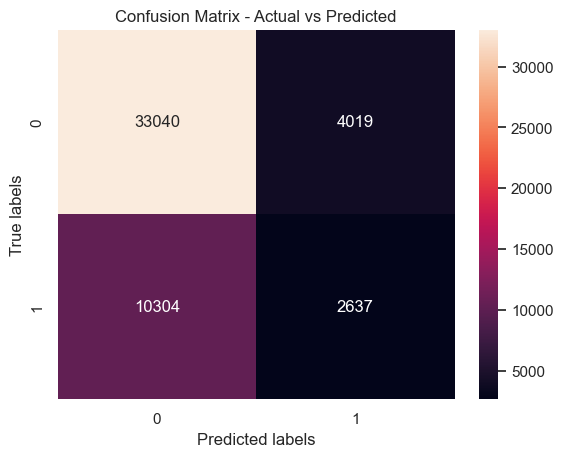

              precision    recall  f1-score   support

           0       0.76      0.89      0.82     37059
           1       0.40      0.20      0.27     12941

    accuracy                           0.71     50000
   macro avg       0.58      0.55      0.55     50000
weighted avg       0.67      0.71      0.68     50000

Accuracy of the model: 0.71354
R-squared: -0.49328417570689487
Root Mean Squared Error (RMSE): 0.5352195811066707


In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import numpy as np
import seaborn as sns
import joblib

# Load and prepare data
df_encoded = pd.read_csv('cleaned_dataset.csv')

# Apply one-hot encoding to the 'Physical Activity' column
if 'Physical Activity' in df_encoded.columns:
    df_encoded = pd.get_dummies(df_encoded, columns=['Physical Activity'])

# Splitting data into features and target
X = df_encoded.drop('GDM Risk', axis=1)
y = df_encoded['GDM Risk']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Saving the trained model
joblib.dump(rf_classifier, 'random_forest_gdm_model.joblib')

# Predicting the test set results
y_pred = rf_classifier.predict(X_test)

# Visualization: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

# Display classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy of the model:", accuracy_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


# Logistic_Regression


c:\Users\billy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


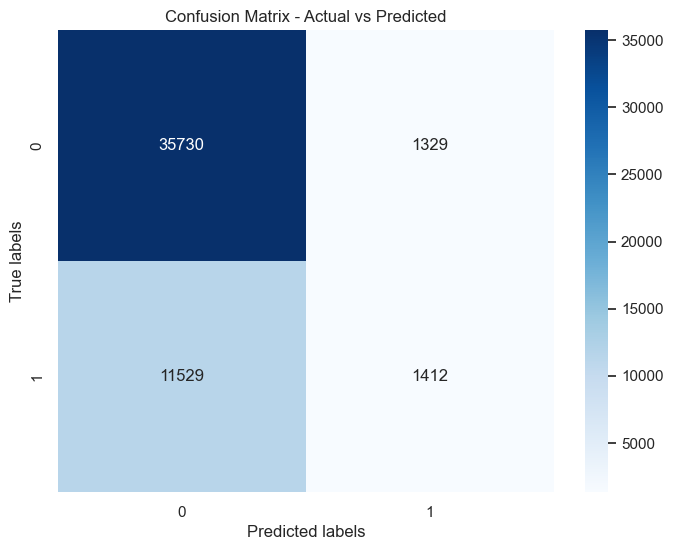

              precision    recall  f1-score   support

           0       0.76      0.96      0.85     37059
           1       0.52      0.11      0.18     12941

    accuracy                           0.74     50000
   macro avg       0.64      0.54      0.51     50000
weighted avg       0.69      0.74      0.67     50000

Accuracy of the model: 0.74284
R-squared: -0.34054652874671887
Root Mean Squared Error (RMSE): 0.5071094556404958


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd

# Assuming df_encoded is your DataFrame with the target 'GDM Risk' and it is already preprocessed
X = df_encoded.drop('GDM Risk', axis=1)
y = df_encoded['GDM Risk']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Training the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(log_reg, 'logistic_regression_gdm_model.joblib')

# Predicting the test set results
y_pred = log_reg.predict(X_test)

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Actual vs Predicted')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))

# Display accuracy
print("Accuracy of the model:", accuracy_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R-squared: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")